In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./fake_jobs_dataset_v2.csv')

In [3]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [6]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(17880, 18)

In [8]:
#df = df[['title', 'location', 'company_profile', 'has_company_logo', 'employment_type', 'industry', 'fraudulent']]
df = df[['title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent']]

In [9]:
df.isna().apply(pd.value_counts)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
False,17880.0,17534,6333,2868,14572,17879,15185,10670,17880.0,17880.0,17880.0,14409,10830,9775,12977,11425,17880.0
True,NaN,346,11547,15012,3308,1,2695,7210,NaN,NaN,NaN,3471,7050,8105,4903,6455,NaN


In [10]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

<AxesSubplot:xlabel='function', ylabel='count'>

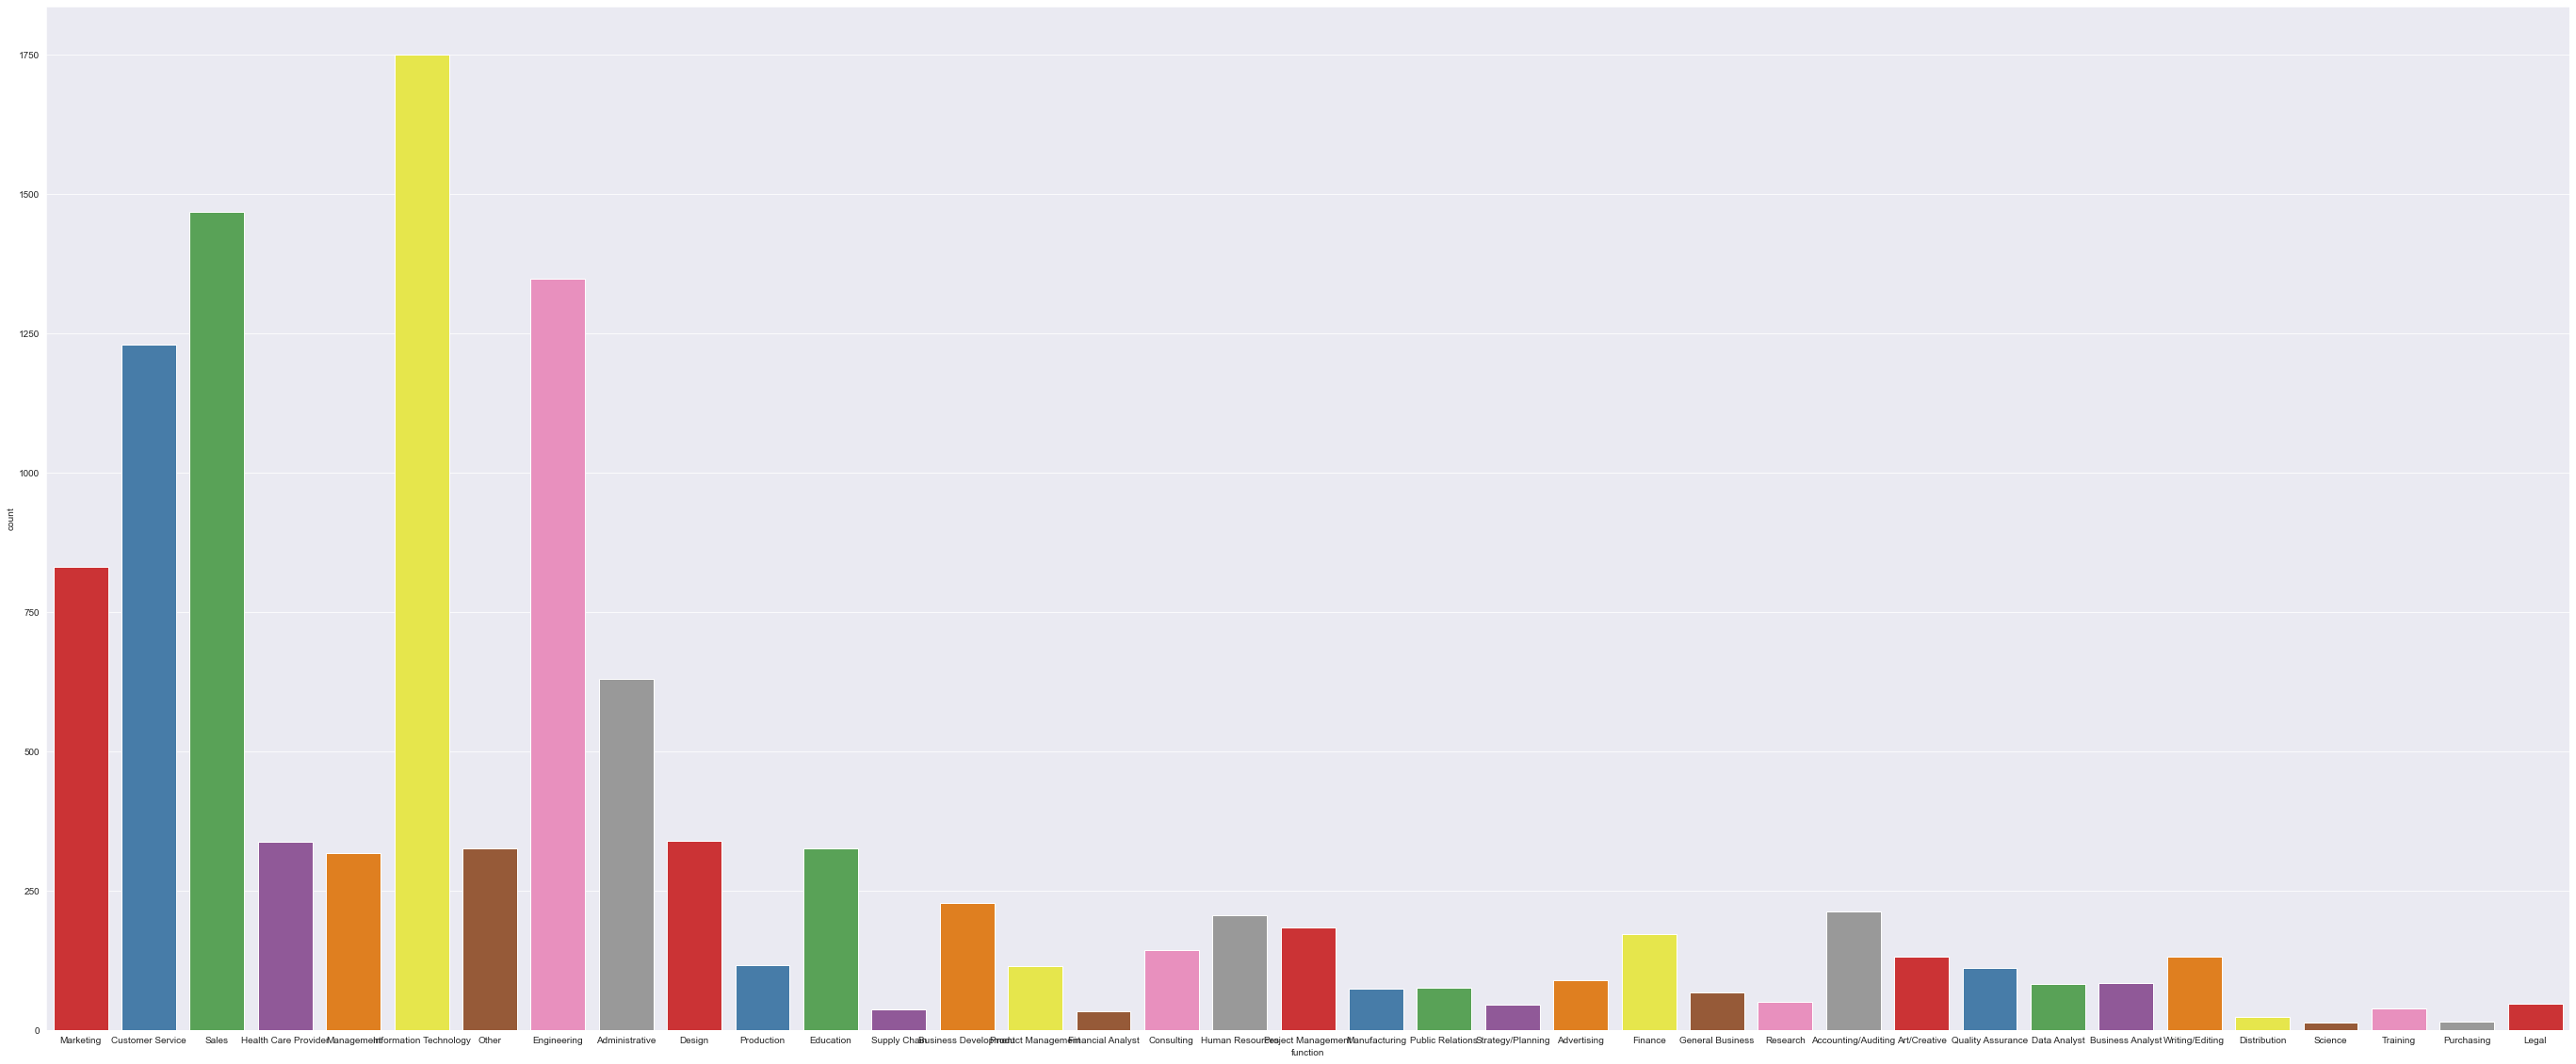

In [14]:
plt.figure(figsize=(48,20))
sb.set_style("darkgrid")
sb.countplot(x='function',data=df,palette='Set1')

In [15]:
df['salary_range'].isnull()

0        True
1        True
2        True
3        True
4        True
         ... 
17875    True
17876    True
17877    True
17878    True
17879    True
Name: salary_range, Length: 17880, dtype: bool

In [16]:
nan_rows = df.loc[df.isna().any(axis=1)]

In [17]:
print(nan_rows)

                                                   title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing          NaN   
1            NZ, , Auckland      Success          NaN   
2             US, IA, Wever          NaN          NaN   
3        US, DC, Washington        Sales          N

In [18]:
# pd.set_option("display.max_rows", None)
pd.set_option("display.max_rows", 20)

In [19]:
df_industry = df[df['fraudulent']== 1]

In [20]:
df_industry['industry'].value_counts()

Oil & Energy                   109
Accounting                      57
Hospital & Health Care          51
Marketing and Advertising       45
Financial Services              35
                              ... 
Civic & Social Organization      1
Public Safety                    1
Wholesale                        1
Consumer Goods                   1
Online Media                     1
Name: industry, Length: 62, dtype: int64

In [21]:
df['industry'].value_counts()['Oil & Energy']

287

In [22]:
df['industry'].value_counts()['Accounting']

159

In [23]:
df['industry'].value_counts()['Hospital & Health Care']

497

In [24]:
df['industry'].value_counts()['Marketing and Advertising']

828

In [25]:
df['industry'].value_counts()['Financial Services']

779

In [26]:
#Oil & Energi, Accounting are the two industries that has the highest rates of fraud jobs, a bit more then a third of the jobs a frauds

In [27]:
df.loc[df['industry'] == 'Oil & Energy']

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
33,Completion Engineer,"US, CA, San Ramon",NaN,NaN,Valor Services provides Workforce Solutions th...,About the CompanyThis is an amazing job opport...,Education:Bachelor of Science in Petroleum Eng...,NaN,0,1,1,Full-time,NaN,Bachelor's Degree,Oil & Energy,Engineering,0
37,PROJECT MANAGER,"US, TX, HOUSTON",NaN,NaN,NaN,we are looking for a Project Manager. The Proj...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Engineering,0
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
182,Facilities Engineer,"US, TX, Houston",NaN,NaN,Valor Services provides Workforce Solutions th...,SUMMARYProvide engineering support to execute ...,EDUCATION and/or EXPERIENCEBachelor’s degree i...,NaN,0,1,1,Full-time,NaN,NaN,Oil & Energy,Engineering,0
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17604,Subsea Installation Engineer,"US, TX, Houston",NaN,NaN,NaN,Job Description: Candidate should have a stron...,EDUCATION / ERXPERIENCE:Bachelor's Degree in M...,NaN,0,0,0,Full-time,NaN,NaN,Oil & Energy,Engineering,1
17678,Vacancy in Halliburton,"GB, ABE, Scotland",NaN,80000-120000,NaN,The Human Resource Department of Halliburton O...,Interested persons should possess a minimum o...,NaN,0,0,1,Full-time,Entry level,Certification,Oil & Energy,NaN,1
17793,Project Controls Technician,"US, CA, Bakersfield",Oil & Energy,NaN,...,Essential Duties and Responsibilities:* Assist...,General Qualifications:Excellent communication...,"* Clean, safe, and enjoyable working environme...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Oil & Energy,Accounting/Auditing,1
17796,Office Assistant/Clerical Administrative,"US, GA, Atlanta",NaN,1000-3000,NaN,Basic Job Duties Include:-Answer all incoming ...,Strong administrative and data management skil...,"Health insurance offered,Dental, Vision, 401K",0,0,0,Full-time,Associate,Bachelor's Degree,Oil & Energy,Administrative,1


In [28]:
df.loc[df['industry'] == 'Accounting']

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
359,Part Time Quickbooks Bookkeeper,"CA, ON, Toronto",NaN,NaN,10 years of evolving business relations has ta...,Offshoot Inc. is looking for candidates with a...,Eligible candidates must:Have 3 years (minimum...,NaN,0,1,0,Part-time,NaN,NaN,Accounting,Accounting/Auditing,0
488,"Sr. Manager Plant Controller - Tyler, TX","US, TX, Tyler",NaN,NaN,We Provide Full Time Permanent Positions for m...,"Sr. Manager Plant Controller - Tyler, TX Locat...",Job Requirements &amp; Experience:Minimum of 1...,NaN,0,0,0,Full-time,NaN,NaN,Accounting,NaN,0
504,Financial Controller,"GB, LND, London",FIN,NaN,Depop is an exciting new mobile marketplace wh...,About DepopDepop is an exciting new mobile mar...,"About YouA good degree is important, ideally (...","Sharing winsEvery day we have standups, every ...",0,1,0,Full-time,Associate,Professional,Accounting,Accounting/Auditing,0
556,Asistente Administrativa,"PA, 8, Panama",NaN,NaN,R.H. ÁGIL es una empresa dedicada a ofrecer se...,Servicio al ClienteBuenas relaciones personale...,Estudiante en Contabilidad o Carreras afinesBa...,NaN,0,1,1,Full-time,Entry level,High School or equivalent,Accounting,Accounting/Auditing,0
941,Accountant,"US, CA, Santa Monica",NaN,NaN,PROSULTING IS PEOPLE The ProSulting difference...,We are seeking an experienced Contract Auditor...,Three to Five years of experience in contract ...,NaN,0,1,1,Contract,Mid-Senior level,Bachelor's Degree,Accounting,Accounting/Auditing,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17773,Receptionist/ Admin,"US, NY, New York",NaN,0-0,NaN,We have an immediate opening for a receptionis...,NaN,NaN,0,0,0,Full-time,Entry level,Certification,Accounting,Administrative,1
17781,ADMINISTRATIVE ASSISTANT,"US, NY, New York",NaN,17000-21000,NaN,LabCorp is seeking an Administrative Assistant...,Experience in: Providing administrative suppo...,BENEFITS AND JOB ENTITLEMENT : 401( k ) Saving...,0,0,0,Part-time,Entry level,Certification,Accounting,Administrative,1
17783,administrative assistant,"US, MD, Baltimore",admin,15-19,NaN,Giromax technology is currently looking for...,-Some College-VERY Detail Oriented and well or...,Competitive pay &amp; benefitsExcellent on-boa...,0,0,0,Full-time,Entry level,NaN,Accounting,Administrative,1
17785,(Work from Home) $20/hr,"US, NY,",NaN,NaN,NaN,We are seeking professionals from all walks of...,Entry level Traders should have at least some ...,"Upon completion of training, each representati...",0,0,0,Full-time,Entry level,High School or equivalent,Accounting,Finance,1


In [65]:
features=['title','department', 'company_profile', 'requirements','description',
          'benefits', 'employment_type', 'required_experience',
          'required_education', 'industry', 'function','fraudulent']

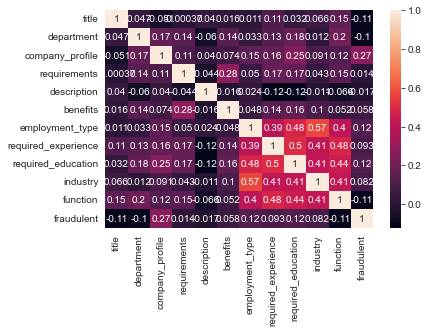

In [66]:
sns.heatmap(df[features].corr(),annot=True);

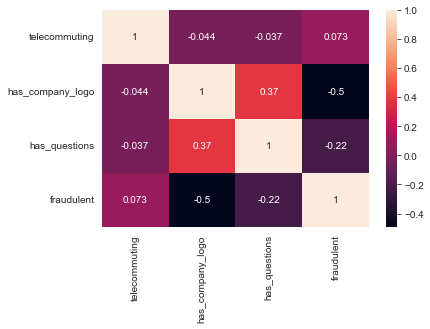

In [67]:
sns.heatmap(df[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

In [29]:
df.loc[df['fraudulent'] == 1]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17828,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17829,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17830,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


In [30]:
df.loc[(df['location'].isnull()) & (df['fraudulent'] == 1)]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1878,KMC,NaN,NaN,NaN,NaN,This is for the KMC project.We are looking for...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1993,Facilities Development Engineer,NaN,NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributesBachel...,NaN,0,1,0,Full-time,Executive,Bachelor's Degree,Oil & Energy,Engineering,1
2277,Food and Beverage Director,NaN,1411,75000-80000,NaN,You will be responsible for directing the outl...,"* Budgeting, planning and controlling the fina...",NaN,0,0,0,Contract,NaN,NaN,Hospitality,NaN,1
5759,"Agency Sales Managers $150-$175,000/yr",NaN,NaN,NaN,We have aggressive growth plans in place for t...,We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,- Complete online training and office support-...,0,1,0,Full-time,Associate,High School or equivalent,Financial Services,Sales,1
7202,Executive Chef,NaN,1221,75000-80000,NaN,Responsible for all food production including ...,* Must have a passion and love for food* Excel...,NaN,0,0,0,Contract,NaN,NaN,Hospitality,NaN,1
7480,Operating Room RN,NaN,NaN,NaN,NaN,Find more jobs at #URL_1efb08d6a6da1c56afb2d0c...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
9098,Restaurant Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,Restaurant managers ensure that restaurants op...,"* Budgeting, planning and controlling the fina...",NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,1
11037,Migration Center,NaN,NaN,NaN,NaN,Work with Rohan to develop,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
11077,Real Services,NaN,NaN,NaN,NaN,See Rohan,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [31]:
df.loc[df['location'].isnull()]

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
204,Junior Python Developer,NaN,Line-Up,NaN,Playfair Capital is an early stage technology ...,Who we’re looking forMaker MentalityAre you fo...,Skills and experienceDegree in Computer Scienc...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
234,Postgraduate Certificate in Social Innovation ...,NaN,NaN,NaN,The Amani Institute is about developing whole ...,"This unique, field-based, full-time program br...",What do we look for in a program participant?I...,Sign up for:25 classmates from around the worl...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
325,Head of Quality Assurance,NaN,NaN,NaN,Gelato Group is a SaaS company. We've develope...,Following our global expansion we are seeking ...,A minimum of B.S. degree in Information Techno...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
349,Embedded Systems / Telematics Security Consultant,NaN,Professional Services,NaN,Cylance is a global cybersecurity products and...,SummaryImmediate requirement for an advanced t...,QualificationsBachelor degree in Information T...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17792,Rooms Division Manager,NaN,NaN,NaN,Awarded by Expatriate Lifestyle Magazine with ...,The Rooms Division Manager is responsible for ...,High school or equivalent education required. ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,1
17809,Data Entry / Administrative Assitstant / Admin...,NaN,NaN,NaN,NaN,As a Data Entry / Administrative Assitstant /...,NaN,NaN,1,0,0,Full-time,Entry level,Unspecified,Telecommunications,Administrative,1
17821,Webcam Model,NaN,NaN,NaN,NaN,Internet Modeling is a premier adult modeling ...,In order to be considered for a webcam model p...,We provide the following benefits to all our w...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17822,5 Guys,NaN,NaN,NaN,NaN,Analyze the excel books of the franchise and t...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1


In [32]:
df_fraudulent = df.loc[df['fraudulent'] == 1]
df_not_fraudulent = df.loc[df['fraudulent'] == 0]
df_fraudulent.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1


In [33]:
df_not_fraudulent.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [34]:
df_fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 98 to 17831
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                866 non-null    object
 1   location             847 non-null    object
 2   department           335 non-null    object
 3   salary_range         223 non-null    object
 4   company_profile      279 non-null    object
 5   description          865 non-null    object
 6   requirements         712 non-null    object
 7   benefits             502 non-null    object
 8   telecommuting        866 non-null    int64 
 9   has_company_logo     866 non-null    int64 
 10  has_questions        866 non-null    int64 
 11  employment_type      625 non-null    object
 12  required_experience  431 non-null    object
 13  required_education   415 non-null    object
 14  industry             591 non-null    object
 15  function             529 non-null    object
 16  fraud

In [35]:
df_not_fraudulent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17014 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17014 non-null  object
 1   location             16687 non-null  object
 2   department           5998 non-null   object
 3   salary_range         2645 non-null   object
 4   company_profile      14293 non-null  object
 5   description          17014 non-null  object
 6   requirements         14473 non-null  object
 7   benefits             10168 non-null  object
 8   telecommuting        17014 non-null  int64 
 9   has_company_logo     17014 non-null  int64 
 10  has_questions        17014 non-null  int64 
 11  employment_type      13784 non-null  object
 12  required_experience  10399 non-null  object
 13  required_education   9360 non-null   object
 14  industry             12386 non-null  object
 15  function             10896 non-null  object
 16  frau

In [36]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [37]:
fraud = df[df['fraudulent']== 1]
fraud.shape

(866, 17)

In [38]:
not_fraud = df[df['fraudulent']== 0]
not_fraud.shape

(17014, 17)

In [39]:
fraud = fraud.sample(17014, replace=True)

In [40]:
fraud.shape, not_fraud.shape

((17014, 17), (17014, 17))

In [41]:
df = fraud.append(not_fraud)
df.reset_index()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_12464\3513025948.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = fraud.append(not_fraud)


,index,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6301,HSE Manager,"US, TX, Houston",NaN,NaN,NaN,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Exper...,We offer• Friendly colleagues in an industry w...,0,0,0,NaN,NaN,NaN,Oil & Energy,Other,1
1,17736,NICU RN,"US, NV,",NaN,NaN,NaN,Find more jobs at #URL_4708e598004bb0a85bf09f9...,NaN,NaN,0,0,0,Full-time,NaN,NaN,Hospital & Health Care,NaN,1
2,5353,Sales Rep Needed $$$$$$$$$$$,"US, CA, Montebello",sales,NaN,NaN,Alliance is looking for people who are passion...,Required Skills and Qualifications:Excellent v...,We provide full training for this position Th...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
3,17759,Customer Service Representative,"US, NY, New York",Customer Service,30000-50000,Gary Cartwright established Cartwright Propert...,We are Seeking a candidate whose core values i...,Home Computer with Internet AccessBasic Comput...,"Weekly pay, PTO, Paid Holidays, 401 k",1,1,0,Full-time,Entry level,High School or equivalent,Real Estate,Customer Service,1
4,5506,Home Based Payroll Data Entry Clerk Position -...,"US, GA, Abbeville",NaN,NaN,NaN,We are a full-service marketing and staffing f...,RequirementsAll you need is access to the Inte...,This is an entry level position and we offer f...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34023,17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
34024,17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
34025,17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
34026,17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df['title'] = le.fit_transform(df['title'])
df['location'] = le.fit_transform(df['location'])
df['department'] = le.fit_transform(df['department'])
df['salary_range'] = le.fit_transform(df['salary_range'])
df['company_profile'] = le.fit_transform(df['company_profile'])
df['description'] = le.fit_transform(df['description'])
df['requirements'] = le.fit_transform(df['requirements'])
df['benefits'] = le.fit_transform(df['benefits'])
df['telecommuting'] = le.fit_transform(df['telecommuting'])
df['has_company_logo'] = le.fit_transform(df['has_company_logo'])
df['has_questions'] = le.fit_transform(df['has_questions'])
df['employment_type'] = le.fit_transform(df['employment_type'])
df['required_experience'] = le.fit_transform(df['required_experience'])
df['required_education'] = le.fit_transform(df['required_education'])
df['industry'] = le.fit_transform(df['industry'])
df['function'] = le.fit_transform(df['function'])

In [44]:
df = df.reset_index()
df.head()

,index,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,6301,4243,2875,1337,874,1709,3113,6575,5253,0,0,0,5,7,13,88,23,1
1,17736,6390,2454,1337,874,1709,4434,11968,6205,0,0,0,1,7,13,51,37,1
2,5353,8509,1505,1326,874,1709,1312,7344,6082,0,0,0,5,7,13,131,37,1
3,17759,2258,2535,316,448,592,11988,4442,5356,1,1,0,1,2,4,107,7,1
4,5506,4456,1802,1337,874,1709,12038,7826,4517,0,0,0,5,7,13,131,37,1


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df[['index', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function']].values
Y = df[['fraudulent']].values

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [48]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((25521, 17), (8507, 17), (25521, 1), (8507, 1))

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier(n_estimators=5)

In [52]:
rfc.fit(X_train, Y_train)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_12464\1640918255.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, Y_train)


RandomForestClassifier(n_estimators=5)

In [53]:
Y_pred = rfc.predict(X_test)

In [54]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()

In [55]:
df_rfc = pd.DataFrame({'Y_test': Y_test , 'Y_pred': Y_pred}) 
df_rfc

,Y_test,Y_pred
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
8502,0,0
8503,1,1
8504,0,0
8505,1,1


In [56]:
print('Random Forest:', accuracy_score(Y_pred, Y_test))

Random Forest: 0.9963559421652757


In [57]:
rfc.predict([[17612,10592,38,1337,874,1709,11720,5824,6205,0,0,0,3,7,13,131,37]])

array([1], dtype=int64)

In [58]:
# Maybe make a if statement that flags if 4 or more attributes are missing